### 非参数回归模型
参数方法通常更灵活，可以揭示数据中可能被遗漏的结构。数据平滑（data smooth）通过建立近似函数尝试抓住数据中的主要模式，去除噪声数据、结构细节或瞬时现象，来平滑一个数据集。在平滑过程中，信号数据点被修改，由噪声数据产生的单独数据点被降低，低于毗邻数据点的点被提升，从而得到一个更平滑的信号。<br>
数据平滑的方法主要有：LOESS局部加权回归（Locally Weighted Scatterplot Smoothing，LOWESS或LOESS）、广义可加模型（Generalised Additive Model，GAM）、Savitzky-Golay平滑、样条（spline）数据平滑。<br>
* LOESS 数据平滑，主要思想是取一定比例的局部数据，在这部分子集中拟合多项式回归曲线，这样就可以观察到数据在局部展现出来的规律和趋势。曲线的光滑程度与选取的数据比例有关：比例越小，拟合越不平滑，反之越平滑，如图5-1-4（f）所示。
* GAM数据平滑，其拟合通过一个迭代过程（向后拟合算法）对每个预测变量进行样条平滑，其算法要在拟合误差和自由度之间进行权衡，最终达到最优，如图5-1-4（g）所示。
* 样条数据平滑，回归样条法是最重要的非线性回归方法之一，为了克服多项式回归的缺点，它把数据集划分成多个连续的区间，并用单独的模型来拟合，如图5-1-4（h）所示。

In [11]:
import pandas as pd
import numpy as np
from plotnine import *
# import skmisc

In [2]:
df = pd.read_csv(r'C:\Users\1000257489\Documents\2022\Angelina\Study\Beautiful_Visualization_with_Python\Beautiful-Visualization-with-python-master\第5章 数据关系型图表\Scatter_Data.csv')
df.shape, df.head()

((31, 2),
    x          y
 0  1  10.405390
 1  2  15.504220
 2  3  15.929692
 3  4  14.882990
 4  5  15.960976)

#### 图(f)

C:\Users\1000257489\Anaconda3\lib\site-packages\plotnine\stats\smoothers.py:309: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.


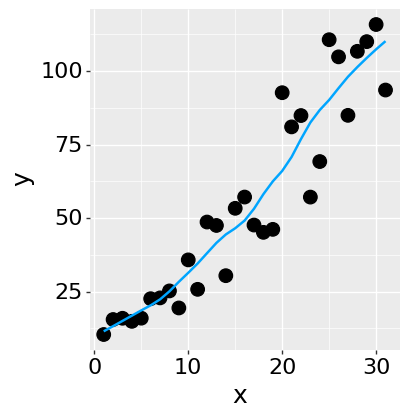

In [18]:
pf = (ggplot(df, aes(x='x', y='y'))
      + geom_point(color='black', fill='black', size=5, shape='o')
      + geom_smooth(method='lowess', span=0.4, se=True, color='#00A5FF', fill='#00A5FF', alpha=0.2) # to lowess method, se setting no use at all
#       geom_smooth method: ['lm', 'ols', 'wls', 'rlm', 'glm', 'gls', 'lowess', 'loess', 'mavg', 'gpr']
      + scale_y_continuous(breaks=np.arange(0, 126, 25))
      + theme(axis_title=element_text(size=18, color='black', face='plain'),
             axis_text=element_text(size=16, color='black', face='plain'),
             legend_position='none',
             aspect_ratio=1.1,
             figure_size=(4, 4),
             dpi=100)
     )
print(pf)

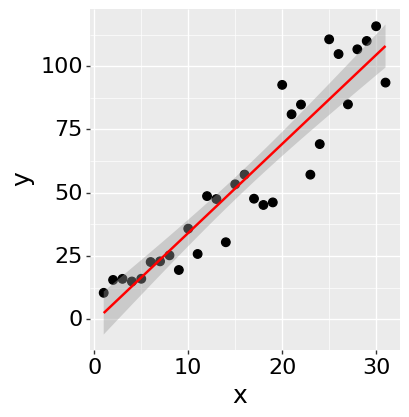

In [26]:
ph = (ggplot(df, aes('x', 'y'))
      + geom_point(color='black', fill='black', size=3, shape='o')
      + geom_smooth(method='glm', se=True, color='red')
      + scale_y_continuous(breaks=np.arange(0, 126, 25))
      + theme(axis_title=element_text(size=18, color='black', face='plain'),
             axis_text=element_text(size=16, color='black', face='plain'),
             legend_position='none',
             aspect_ratio=1.1,
             figure_size=(4, 4),
             dpi=100)
     )
print(ph)

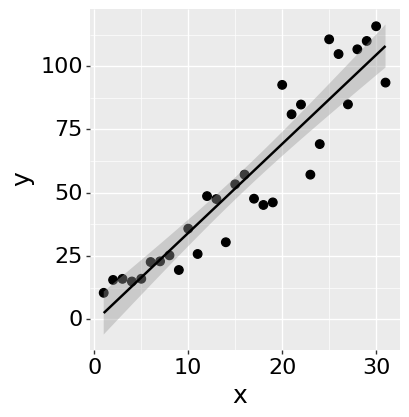

In [28]:
ph = (ggplot(df, aes('x', 'y'))
      + geom_point(color='black', fill='black', size=3, shape='o')
      + geom_smooth(method = 'glm',formula='y ~ x')
      + scale_y_continuous(breaks=np.arange(0, 126, 25))
      + theme(axis_title=element_text(size=18, color='black', face='plain'),
             axis_text=element_text(size=16, color='black', face='plain'),
             legend_position='none',
             aspect_ratio=1.1,
             figure_size=(4, 4),
             dpi=100)
     )
print(ph)

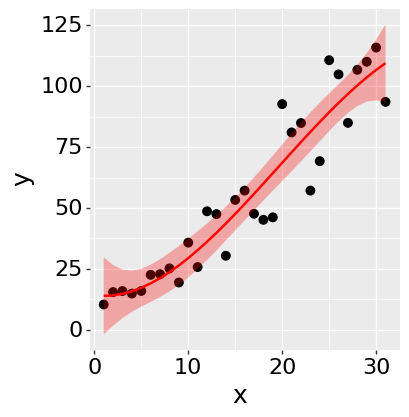

In [55]:
ph = (ggplot(df, aes('x', 'y'))
      + geom_point(color='black', fill='black', size=3, shape='o')
      + geom_smooth(method="lm",se=True,formula='y ~ bs(x, 3)',colour="red", fill="red", alpha=0.3)
      + scale_y_continuous(breaks=np.arange(0, 126, 25))
      + theme(axis_title=element_text(size=18, color='black', face='plain'),
             axis_text=element_text(size=16, color='black', face='plain'),
             legend_position='none',
             aspect_ratio=1.1,
             figure_size=(4, 4),
             dpi=100)
     )
print(ph)

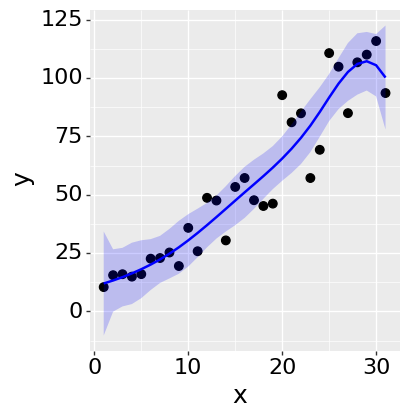

In [54]:
ph = (ggplot(df, aes('x', 'y'))
      + geom_point(color='black', fill='black', size=3, shape='o')
      + geom_smooth(method="lm",se=True,formula='y ~ bs(x, 6)',colour="Blue", fill='Blue', alpha=0.2)
      + scale_y_continuous(breaks=np.arange(0, 126, 25))
      + theme(axis_title=element_text(size=18, color='black', face='plain'),
             axis_text=element_text(size=16, color='black', face='plain'),
             legend_position='none',
             aspect_ratio=1.1,
             figure_size=(4, 4),
             dpi=100)
     )
print(ph)

In [75]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

In [58]:
data = pd.read_csv(r'C:\Users\1000257489\Documents\2022\Angelina\Study\Beautiful_Visualization_with_Python\Beautiful-Visualization-with-python-master\第5章 数据关系型图表\Scatter_Data.csv')
data.shape, data.head()

((31, 2),
    x          y
 0  1  10.405390
 1  2  15.504220
 2  3  15.929692
 3  4  14.882990
 4  5  15.960976)

In [72]:
X = data['x'].values.reshape(-1, 1)
y = data['y']

In [73]:
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

In [74]:
reg = LinearRegression().fit(X_poly, y)
reg.coef_, reg.intercept_

(array([0.        , 2.09103828, 0.04466024]), 6.753053706687474)

In [79]:
pred_y = reg.predict(X_poly)
print("R2:", np.round(r2_score(y, pred_y), 2))

R2: 0.88


In [81]:
reg.coef_[1]

2.0910382846213458

In [ ]:
# y = np.round(reg.coef_[1], 2)*x + np.round(reg.coef_[2], 2)*x**2 + np.round(reg.intercept_, 2)

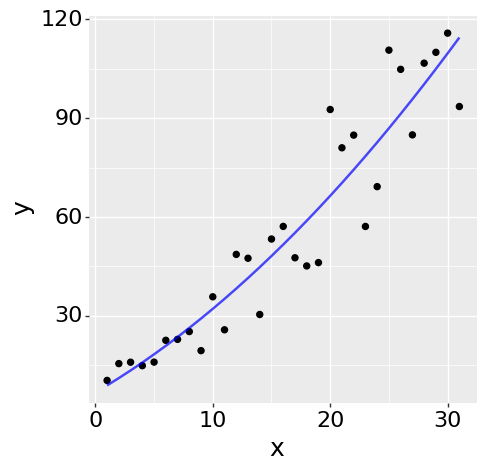

In [105]:
p = (ggplot(data, aes(x='x', y='y'))
     + geom_point(shape='o', size=2, color='black', fill='black')
     + geom_line(aes(x='x', y='reg.coef_[1]*x + reg.coef_[2]*x**2 + reg.intercept_'), color='blue', size=1, alpha=0.7)
#      + scale_color_manual(name='非线性回归(二次)', values='2.09x + 0.04 * x ^ 2 + 6.75')
     + theme(axis_title=element_text(size=18, color='black'),
            axis_text=element_text(size=16, color='black'),
            legend_position=(0.2, 0.7),
            dpi=100,
            figure_size=(5, 4),
            aspect_ratio=1)
    )
print(p)